In [4]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("D://KAGGLE//PROJECTS//covid19-impact//DATASETs//engagement_data//master.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   time              object 
 2   lp_id             float64
 3   pct_access        float64
 4   engagement_index  float64
 5   district          int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1021.9+ MB


In [7]:
prod=pd.read_csv("D://KAGGLE//PROJECTS//covid19-impact//DATASETs/products_info.csv")

prod.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [8]:
district=pd.read_csv("D://KAGGLE//PROJECTS//covid19-impact//DATASETs/districts_info.csv")

district.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [9]:
dist=district.dropna()

In [7]:
dist.info()

NameError: name 'dist' is not defined

In [8]:
df.isnull().sum()/len(df) * 100

Unnamed: 0           0.000000
time                 0.000000
lp_id                0.002423
pct_access           0.060235
engagement_index    24.092292
district             0.000000
dtype: float64

In [9]:
df2=df[~(df['lp_id'].isnull())]

In [10]:
df2.isnull().sum()/len(df2) * 100

Unnamed: 0           0.000000
time                 0.000000
lp_id                0.000000
pct_access           0.060237
engagement_index    24.092602
district             0.000000
dtype: float64

In [10]:
df3= df2[~(df2.pct_access.isnull())]

In [11]:
df3.isnull().sum()/len(df3) * 100

Unnamed: 0           0.000000
time                 0.000000
lp_id                0.000000
pct_access           0.000000
engagement_index    24.046851
district             0.000000
dtype: float64

In [12]:
mdata=df3

In [14]:
type(mdata)

pandas.core.frame.DataFrame

In [13]:
mdata.lp_id=mdata.lp_id.astype(int)

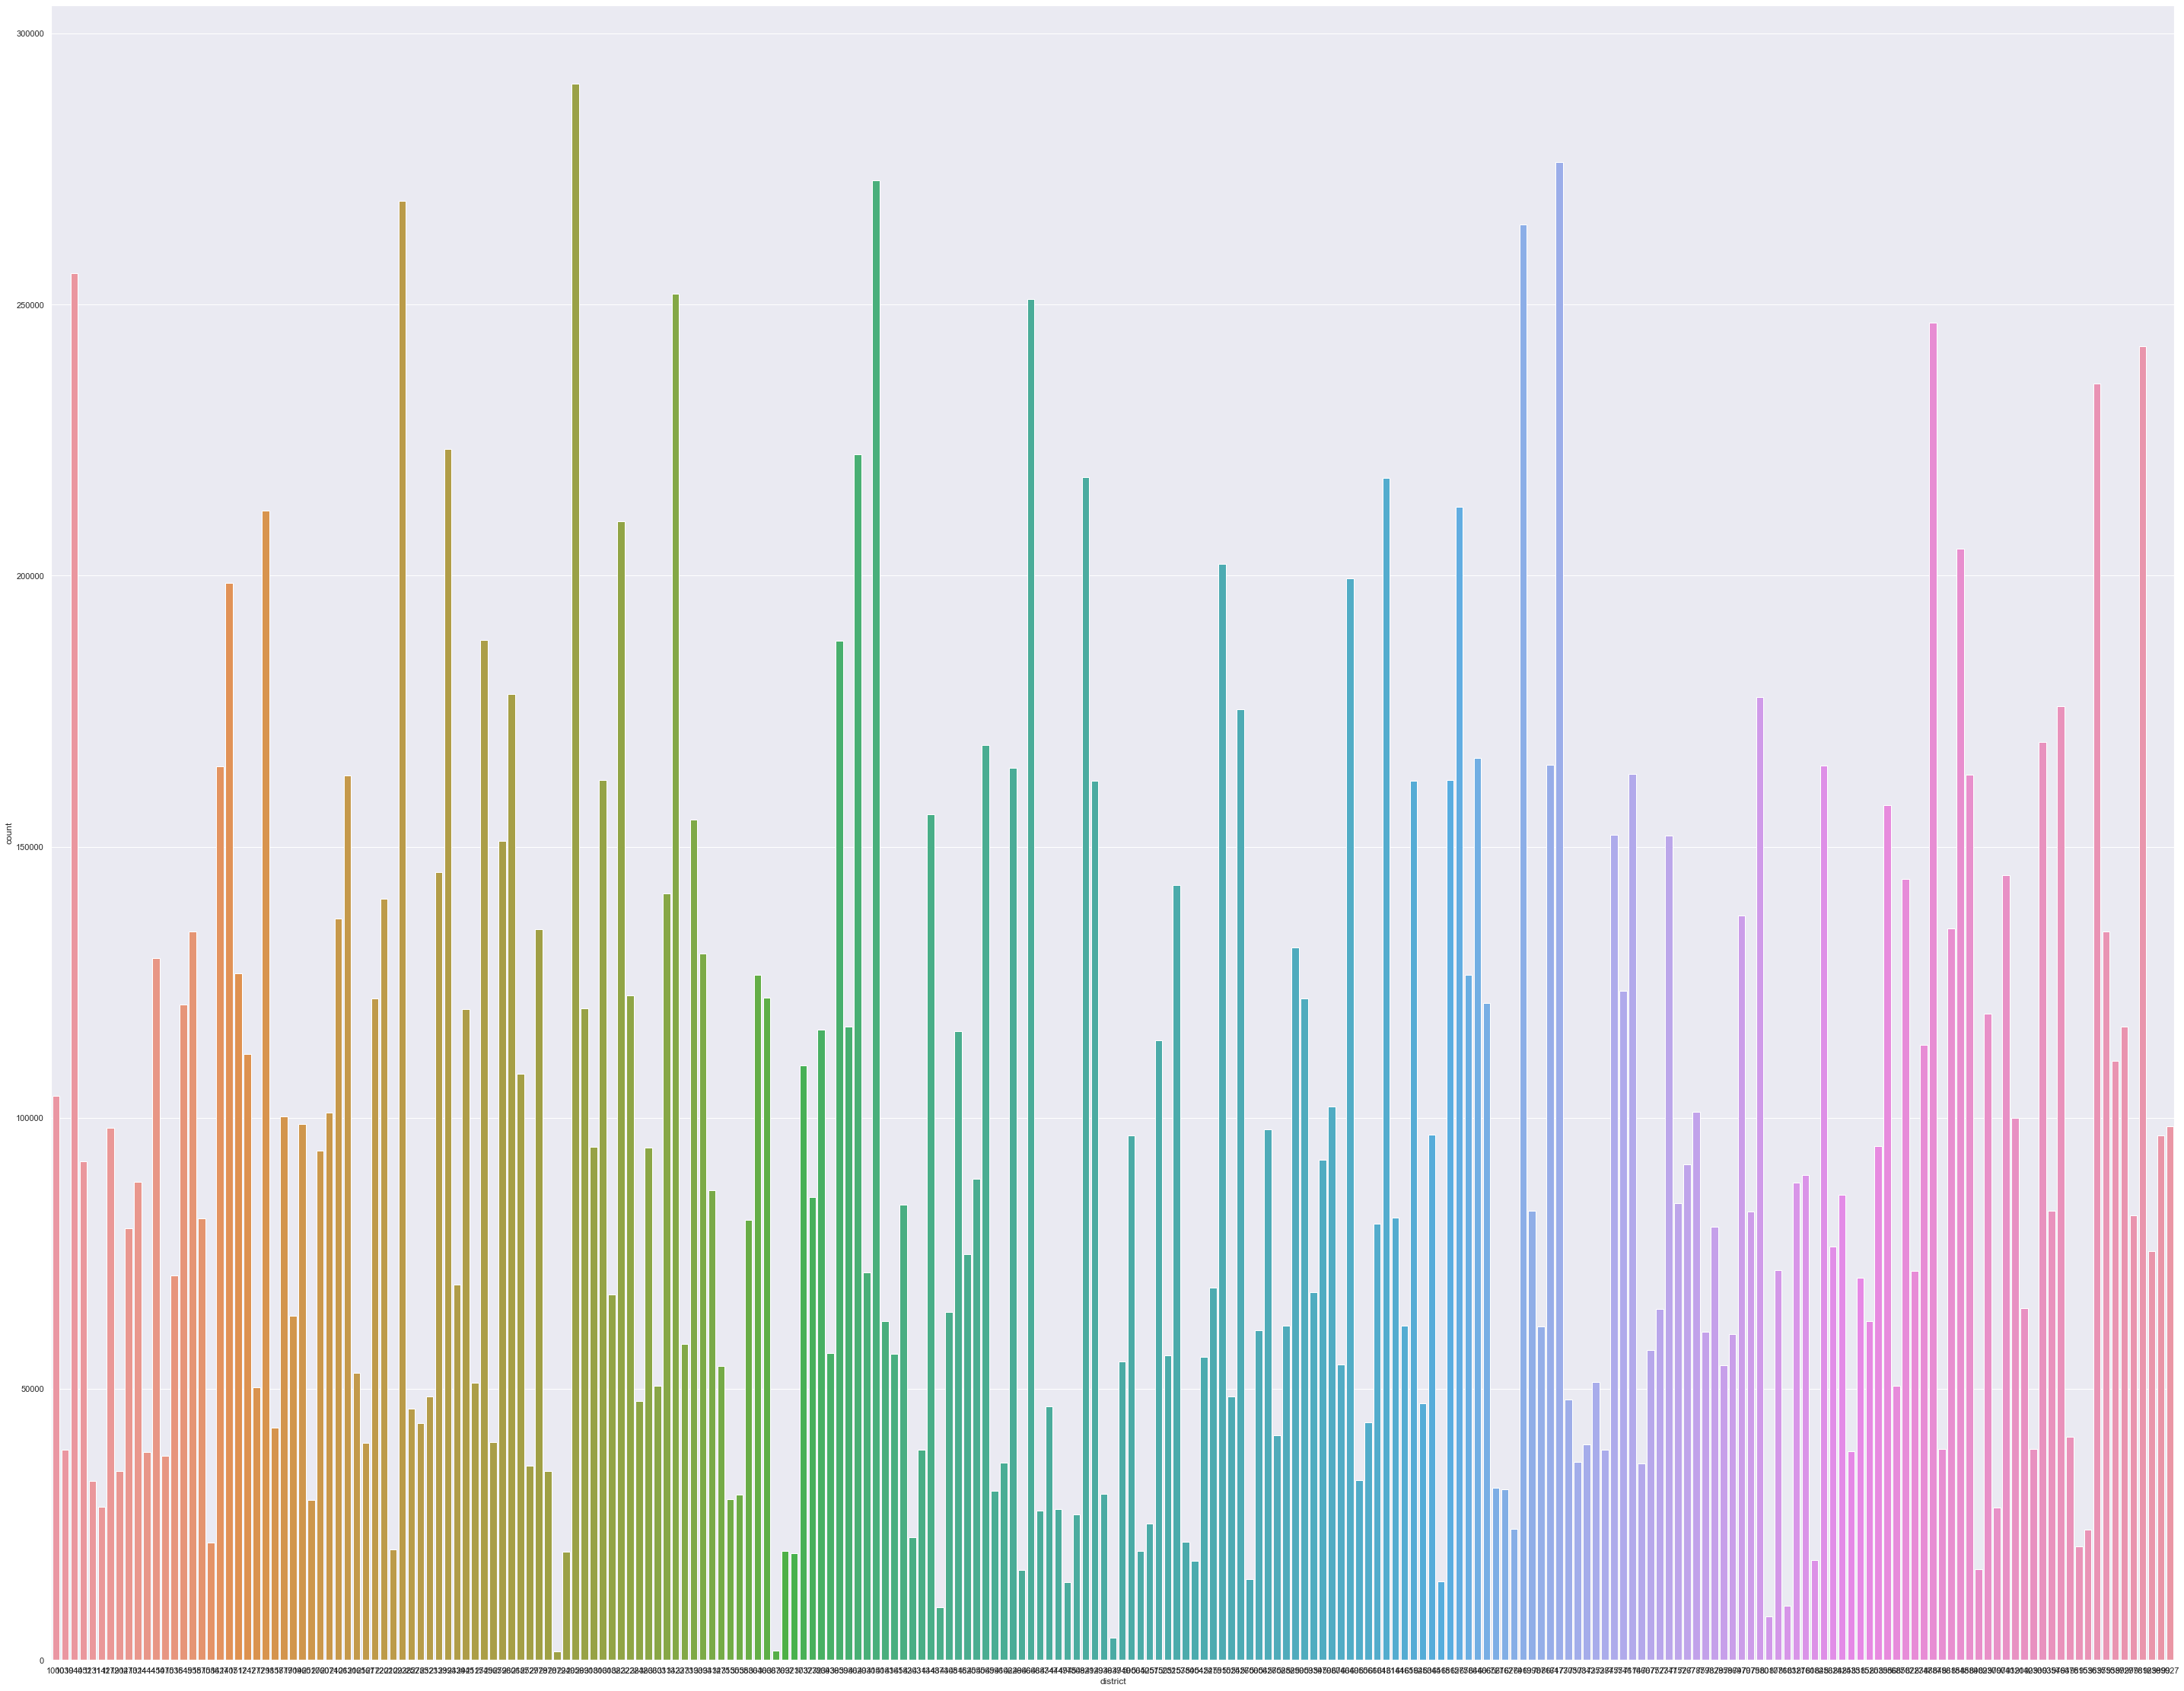

In [14]:
plt.figure(figsize=(50,40))
sns.countplot(x=mdata.district)
plt.show()


In [15]:
df3.corr()


,Unnamed: 0,lp_id,pct_access,engagement_index,district
Unnamed: 0,1.000000,-0.004885,-0.042621,-0.021872,-0.012433
lp_id,-0.004885,1.000000,0.027794,0.022392,-0.001906
pct_access,-0.042621,0.027794,1.000000,0.751541,0.003593
engagement_index,-0.021872,0.022392,0.751541,1.000000,0.001823
district,-0.012433,-0.001906,0.003593,0.001823,1.000000


<AxesSubplot:>

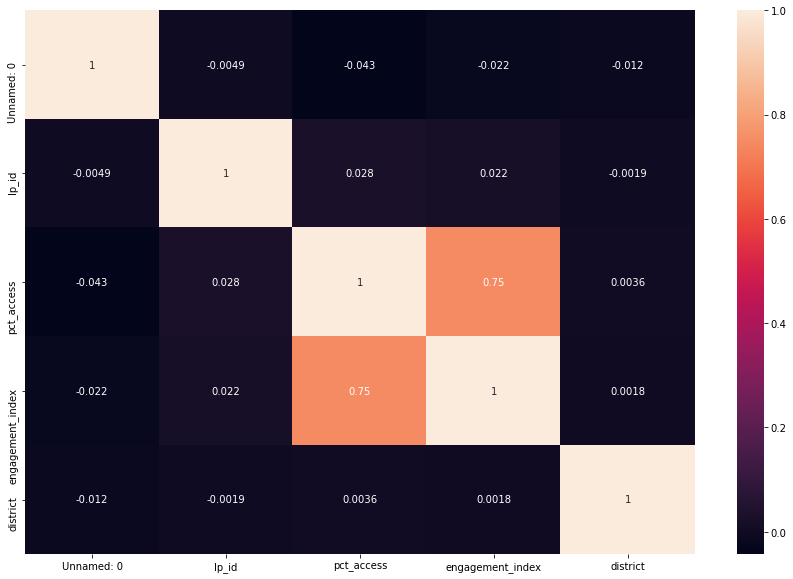

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True)

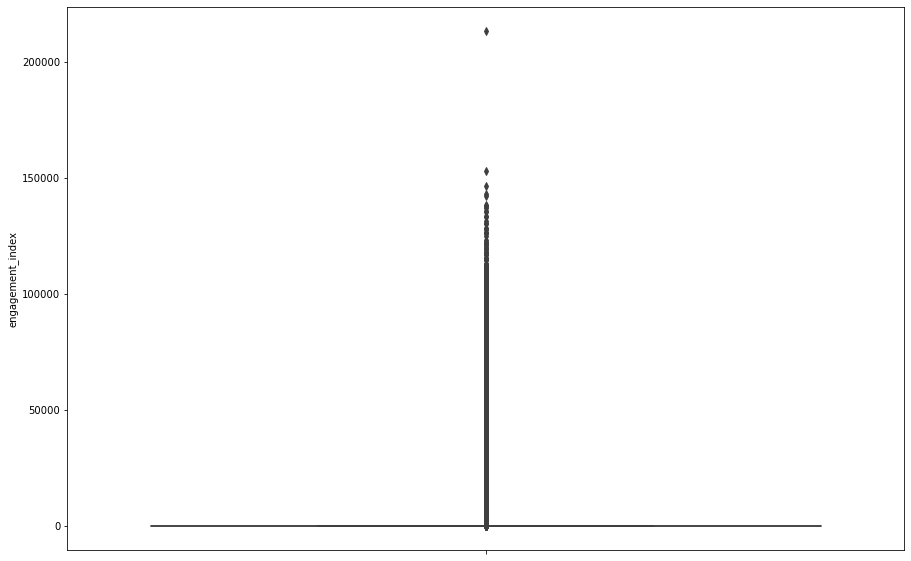

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(y=mdata.engagement_index)
plt.show()

In [19]:
print(mdata.engagement_index.max())
print(mdata.engagement_index.min())
print(mdata.engagement_index.mean())
print(mdata.engagement_index.median())



213045.47
0.01
167.61064372935124
1.92


In [20]:
mdata.engagement_index.describe()

count    1.694530e+07
mean     1.676106e+02
std      1.682247e+03
min      1.000000e-02
25%      3.700000e-01
50%      1.920000e+00
75%      1.365000e+01
max      2.130455e+05
Name: engagement_index, dtype: float64

In [16]:
import datetime
print(datetime.datetime.now())
masterdt=pd.DataFrame()
for i in mdata.district.unique():
    print(i)
    b=mdata.loc[df['district'] == i]
    #b=a[~(a['engagement_index'].isnull())]
    print(b.engagement_index.median())
    b.engagement_index= b.engagement_index.fillna(b.engagement_index.median())
    #print(b.head(1))
    #print(b.tail(1))
    masterdt=masterdt.append(b)
    #print(b.tail(1))

masterdt.isnull().sum()/len(masterdt) * 100
print(datetime.datetime.now())

2021-09-18 03:43:17.804447
1000
3.74
1039
8.5
1044
0.64
1052
4.32
1131
3.56
1142
41.92
1179
3.93
1204
9.99
1270
2.78
1324
5.14
1444
21.31
1450
2.67
1470
14.31
1536
9.03
1549
3.28
1558
2.62
1570
5.33
1584
10.34
1624
2.13
1705
1.39
1712
2.32
1742
2.71
1772
3.07
1791
0.37
1857
7.01
1877
2.83
1904
12.47
1965
7.4
2017
17.49
2060
0.55
2074
1.01
2106
2.88
2130
0.65
2165
2.63
2167
1.31
2172
3.17
2201
1.78
2209
2.115
2238
0.32
2257
22.18
2285
2.38
2321
15.21
2339
1.5
2393
1.22
2439
6.71
2441
1.08
2517
6.24
2549
1.08
2567
0.84
2598
1.39
2601
1.54
2685
0.89
2729
18.02
2779
2.28
2870
0.9
2872
30.3
2940
3.6
2956
0.43
2991
2.32
3080
3.25
3160
0.36
3188
4.65
3222
0.77
3228
3.6
3248
6.23
3266
2.58
3301
3.53
3314
3.89
3322
0.57
3371
1.81
3390
0.95
3393
3.75
3412
2.28
3471
0.34
3550
3.54
3558
3.82
3580
5.81
3640
3.78
3668
2.82
3670
18.12
3692
102.15
3710
24.64
3732
1.02
3772
0.8
3864
0.59
3936
18.49
3959
2.2
3986
4.61
4029
0.36
4031
7.76
4051
0.76
4083
5.16
4165
1.92
4183
1.1
4203
1.51
4314
10.18
4348
1

In [32]:
print(
masterdt.isnull().sum()/len(masterdt) * 100)

indx                0.0
time                0.0
lp_id               0.0
pct_access          0.0
engagement_index    0.0
district            0.0
dtype: float64


In [33]:
x=masterdt.loc[df['district'] == 9553]
print(x.engagement_index.max())
print(x.engagement_index.median())
print(x.engagement_index.min())

137953.8
3.0
0.23


In [34]:
masterdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22310202 entries, 0 to 22324189
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   indx              int64  
 1   time              object 
 2   lp_id             int32  
 3   pct_access        float64
 4   engagement_index  float64
 5   district          int64  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 1.1+ GB


In [35]:
masterdt.corr()

,indx,lp_id,pct_access,engagement_index,district
indx,1.000000,-0.004885,-0.042621,-0.019053,-0.012433
lp_id,-0.004885,1.000000,0.027794,0.019866,-0.001906
pct_access,-0.042621,0.027794,1.000000,0.751944,0.003593
engagement_index,-0.019053,0.019866,0.751944,1.000000,0.003430
district,-0.012433,-0.001906,0.003593,0.003430,1.000000


<AxesSubplot:>

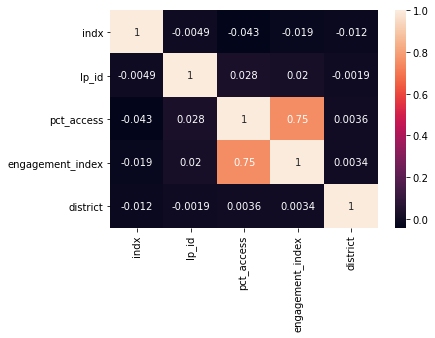

In [36]:
sns.heatmap(masterdt.corr(), annot=True)

In [17]:
masterdt=masterdt.rename(columns={"Unnamed: 0":"indx"})

In [38]:
masterdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22310202 entries, 0 to 22324189
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   indx              int64  
 1   time              object 
 2   lp_id             int32  
 3   pct_access        float64
 4   engagement_index  float64
 5   district          int64  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 1.1+ GB


<AxesSubplot:>

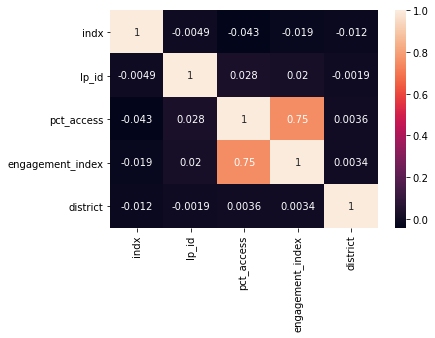

In [39]:
sns.heatmap(masterdt.corr(), annot=True)

In [18]:
masterdt.drop('indx', axis=1)

,time,lp_id,pct_access,engagement_index,district
0,2020-01-01,93690,0.00,3.74,1000
1,2020-01-01,17941,0.03,0.90,1000
2,2020-01-01,65358,0.03,1.20,1000
3,2020-01-01,98265,0.57,37.79,1000
4,2020-01-01,59257,0.00,3.74,1000
...,...,...,...,...,...
22324185,2020-12-31,56028,0.02,0.20,9927
22324186,2020-12-31,14124,0.02,0.99,9927
22324187,2020-12-31,98001,0.00,2.57,9927
22324188,2020-12-31,13496,0.12,6.51,9927


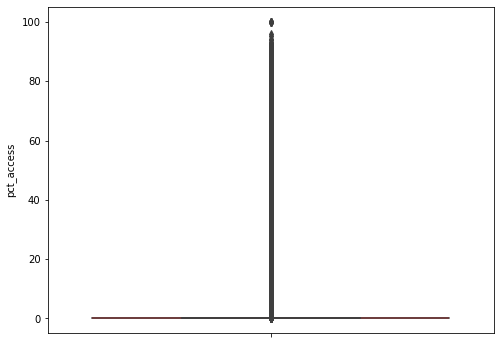

count    2.231020e+07
mean     5.042518e-01
std      3.180606e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e-02
75%      9.000000e-02
max      1.000000e+02
Name: pct_access, dtype: float64


In [41]:

plt.figure(figsize=(8,6))
sns.boxplot(y=masterdt.pct_access,boxprops=dict(color='red'))
plt.show()
print(masterdt.pct_access.describe())

In [42]:
masterdt.pct_access.describe()

count    2.231020e+07
mean     5.042518e-01
std      3.180606e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e-02
75%      9.000000e-02
max      1.000000e+02
Name: pct_access, dtype: float64

In [43]:
print(masterdt.pct_access.max())
print(masterdt.pct_access.min())
print(masterdt.pct_access.mean())
print(masterdt.pct_access.median())


100.0
0.0
0.5042518005243273
0.02


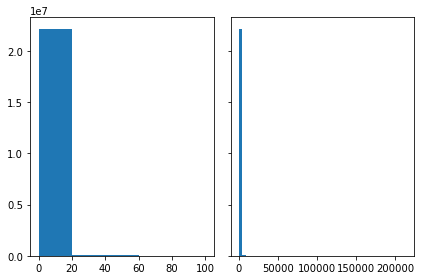

In [44]:
fig,axs=plt.subplots(1,2,sharey=True,tight_layout=True)
axs[0].hist(masterdt.pct_access,bins=5)
axs[1].hist(masterdt.engagement_index,bins=50)
plt.show()

In [45]:
Q1=masterdt.pct_access.quantile(0.25)
Q2=masterdt.pct_access.quantile(0.50)
Q3=masterdt.pct_access.quantile(0.75)
Q4=masterdt.pct_access.quantile(1.0)
IQR=Q3-Q1
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print(IQR)

0.0
0.02
0.09
100.0
0.09


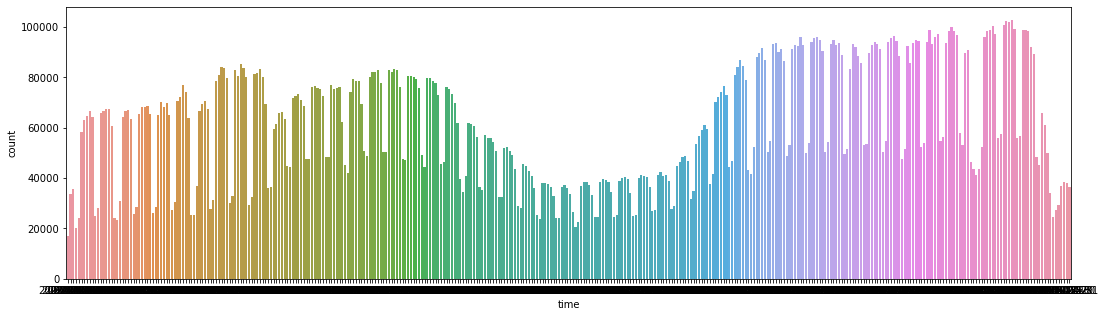

In [46]:
plt.figure(figsize=(18,5))
sns.countplot(masterdt.time)
plt.show()

In [19]:
new = masterdt["time"].str.split("-", n = 2, expand = True)

In [20]:
masterdt['Month']=new[1]

In [21]:
masterdt['Month']=masterdt['Month'].astype(int)

In [50]:
masterdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22310202 entries, 0 to 22324189
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   indx              int64  
 1   time              object 
 2   lp_id             int32  
 3   pct_access        float64
 4   engagement_index  float64
 5   district          int64  
 6   Month             int32  
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 1.2+ GB


In [51]:
masterdt.tail(5)

,indx,time,lp_id,pct_access,engagement_index,district,Month
22324185,98445,2020-12-31,56028,0.02,0.20,9927,12
22324186,98446,2020-12-31,14124,0.02,0.99,9927,12
22324187,98447,2020-12-31,98001,0.00,2.57,9927,12
22324188,98448,2020-12-31,13496,0.12,6.51,9927,12
22324189,98449,2020-12-31,65797,0.08,16.56,9927,12


In [25]:
masterdt.groupby(["Month", "pct_access"] , as_index = False).median()

,Month,pct_access,indx,lp_id,engagement_index,district
0,1,0.00,4595.0,55032.0,1.73,4683.0
1,1,0.01,5924.0,54550.0,0.18,4569.0
2,1,0.02,4933.0,54794.0,0.40,5890.0
3,1,0.03,4650.0,54426.0,0.64,4165.0
4,1,0.04,4266.0,53775.0,1.00,4929.0
...,...,...,...,...,...,...
64819,12,91.13,8282.0,47364.0,50364.97,8017.0
64820,12,91.40,6128.0,47364.0,41334.38,8017.0
64821,12,91.41,7923.0,47364.0,51010.06,8017.0
64822,12,92.40,7597.0,47364.0,47864.34,8017.0


In [22]:
monthVspctmed=masterdt.groupby(["Month"] , as_index = False).mean()
monthVspctmed

,Month,indx,lp_id,pct_access,engagement_index,district
0,1,5268.640535,54885.017389,0.660048,86.066849,5219.073682
1,2,15603.764643,54917.127719,0.616035,127.123032,5151.625270
2,3,26307.069812,54866.148742,0.511965,147.003700,5181.225013
3,4,38986.174772,54902.637021,0.524628,151.915679,5231.879085
4,5,51125.575489,54954.464859,0.454024,123.132590,5252.790347
5,6,62989.357693,54981.700279,0.224684,61.395604,5298.371766
6,7,73600.829008,54998.163153,0.083678,24.168444,5252.115922
7,8,81022.545894,54425.071107,0.255512,75.212577,5287.236950
8,9,88752.333585,54447.464242,0.611203,164.147562,5264.080312
9,10,102355.349463,54416.339072,0.614343,161.364910,5275.931762


In [132]:
monthVspctmax=masterdt.groupby(['Month']).max().sort_values(by='pct_access', ascending=False)
monthVspctmax

,indx,time,lp_id,pct_access,engagement_index,district
Month,,,,,,
1,21093,2020-01-31,99984,100.00,42127.27,9927
2,43293,2020-02-29,99984,100.00,133471.54,9927
8,174930,2020-08-31,99984,96.01,213045.47,9927
11,264134,2020-11-30,99991,95.29,104521.80,9927
5,119831,2020-05-31,99984,93.75,110493.90,9927
9,205566,2020-09-30,99991,93.16,135293.81,9927
12,290682,2020-12-31,99984,92.64,105516.53,9927
3,67561,2020-03-31,99984,92.57,146282.09,9927
4,93718,2020-04-30,99984,91.22,137953.80,9927


In [131]:
monthVspctmax=masterdt.groupby(['Month']).mean().sort_values(by='pct_access', ascending=False)
monthVspctmax

,indx,lp_id,pct_access,engagement_index,district
Month,,,,,
1,5268.640535,54885.017389,0.660048,86.066849,5219.073682
2,15603.764643,54917.127719,0.616035,127.123032,5151.625270
10,102355.349463,54416.339072,0.614343,161.364910,5275.931762
9,88752.333585,54447.464242,0.611203,164.147562,5264.080312
11,116397.080296,54428.935287,0.576539,146.550103,5235.023130
12,130262.257266,54678.665971,0.541139,153.213505,5207.440675
4,38986.174772,54902.637021,0.524628,151.915679,5231.879085
3,26307.069812,54866.148742,0.511965,147.003700,5181.225013
5,51125.575489,54954.464859,0.454024,123.132590,5252.790347


In [23]:
monthVspctcnt=masterdt.groupby(['Month'], as_index = False).count()
monthVspctcnt

,Month,indx,time,lp_id,pct_access,engagement_index,district
0,1,1559411,1559411,1559411,1559411,1559411,1559411
1,2,1666459,1666459,1666459,1666459,1666459,1666459
2,3,1987905,1987905,1987905,1987905,1987905,1987905
3,4,2092156,2092156,2092156,2092156,2092156,2092156
4,5,1926211,1926211,1926211,1926211,1926211,1926211
5,6,1208271,1208271,1208271,1208271,1208271,1208271
6,7,1056275,1056275,1056275,1056275,1056275,1056275
7,8,1525147,1525147,1525147,1525147,1525147,1525147
8,9,2345029,2345029,2345029,2345029,2345029,2345029
9,10,2487781,2487781,2487781,2487781,2487781,2487781


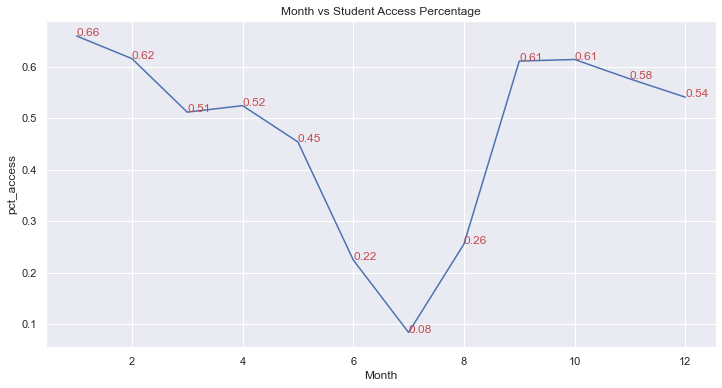

In [24]:
#fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,8))
a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)
#ax=sns.barplot(x='Month',y='indx',data=monthVspctcnt)
#ax.set(ylabel='Count')
#fig, ax2 = plt.subplots()
#ax2 = plt.twinx() 
#sns.lineplot(x='Month',y='pct_access', label="Max",data=monthVspctmax,
#    markers=True, dashes=False, ax=ax2)
#sns.lineplot(x='Month',y='pct_access', label="Average",data=monthVspctmed,
#    markers=True, dashes=False,ax=ax2)

palette = 'r'
sns.lineplot(x='Month', y='pct_access', markers=True, dashes=False, 
             data=monthVspctmed)
for x,y in monthVspctmed[['Month','pct_access']].values:
        ax.text(x,y,f'{y:.2f}',color=palette)
plt.title('Month vs Student Access Percentage')

plt.show()

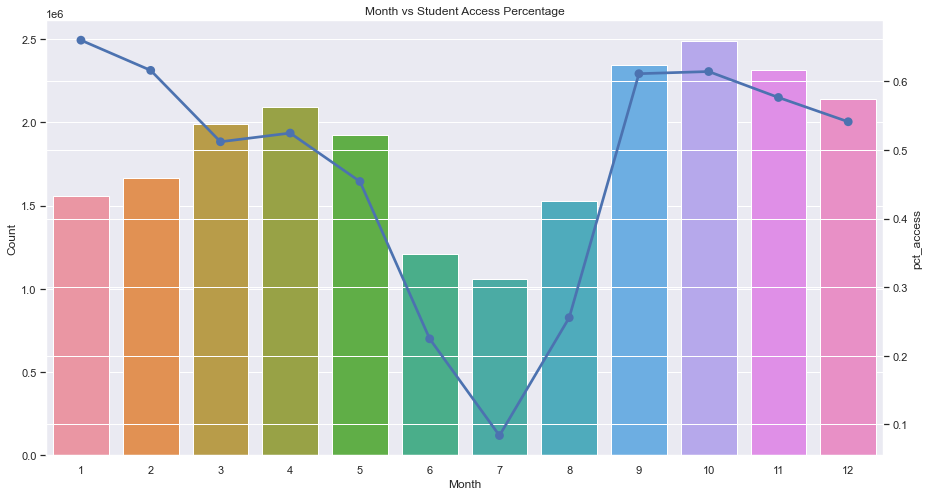

In [25]:
#fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,8))

plt.figure(figsize=(15,8))
ax1=sns.barplot(x='Month',y='indx',data=monthVspctcnt)
ax1.set(ylabel='Count')
#fig, ax2 = plt.subplots()
ax2 = plt.twinx() 
#sns.lineplot(x='Month',y='pct_access', label="Max",data=monthVspctmax,
#    markers=True, dashes=False, ax=ax2)
#sns.lineplot(x='Month',y='pct_access', label="Average",data=monthVspctmed,
#    markers=True, dashes=False,ax=ax2)

palette = 'r'
sns.pointplot(x='Month', y='pct_access',  
             data=monthVspctmed, ax=ax2)
# #X=monthVspctmed.Month
# Y=monthVspctmed['pct_access']


# for x, y  in zip(X, Y ):
#     ax2.text(X, Y, True, color=color)
    
plt.title('Month vs Student Access Percentage')

plt.show()

In [58]:
monthVspctcnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Month             12 non-null     int64
 1   indx              12 non-null     int64
 2   time              12 non-null     int64
 3   lp_id             12 non-null     int64
 4   pct_access        12 non-null     int64
 5   engagement_index  12 non-null     int64
 6   district          12 non-null     int64
dtypes: int64(7)
memory usage: 800.0 bytes


In [59]:
masterdt.groupby(['Month']).max()

,indx,time,lp_id,pct_access,engagement_index,district
Month,,,,,,
1,21093,2020-01-31,99984,100.00,42127.27,9927
2,43293,2020-02-29,99984,100.00,133471.54,9927
3,67561,2020-03-31,99984,92.57,146282.09,9927
4,93718,2020-04-30,99984,91.22,137953.80,9927
5,119831,2020-05-31,99984,93.75,110493.90,9927
6,133856,2020-06-30,99984,71.71,73604.62,9927
7,152810,2020-07-31,99984,61.85,53180.74,9927
8,174930,2020-08-31,99984,96.01,213045.47,9927
9,205566,2020-09-30,99991,93.16,135293.81,9927


In [60]:
masterdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22310202 entries, 0 to 22324189
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   indx              int64  
 1   time              object 
 2   lp_id             int32  
 3   pct_access        float64
 4   engagement_index  float64
 5   district          int64  
 6   Month             int32  
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 1.2+ GB


In [26]:
monthVsindxmed=masterdt.groupby(["Month"] , as_index = False).mean()
monthVsindxmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             12 non-null     int64  
 1   indx              12 non-null     float64
 2   lp_id             12 non-null     float64
 3   pct_access        12 non-null     float64
 4   engagement_index  12 non-null     float64
 5   district          12 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 704.0 bytes


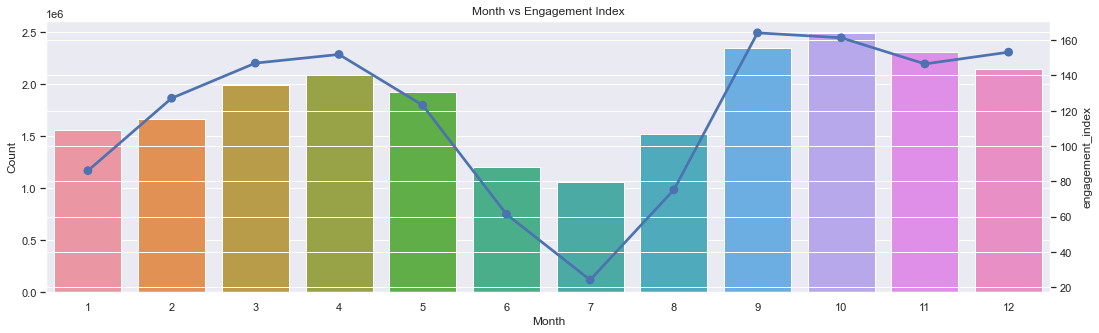

In [27]:
plt.figure(figsize=(18,5))
ax=sns.barplot(x='Month',y='indx',data=monthVspctcnt)
ax.set(ylabel='Count')
ax2 = plt.twinx()
#sns.lineplot(x='Month',y='engagement_index', label="Max",data=monthVspctmax,
 #   markers=True, dashes=False, ax=ax2)
sns.pointplot(x='Month',y='engagement_index', label="Average",data=monthVspctmed,
   ax=ax2)
plt.title('Month vs Engagement Index')
plt.show()

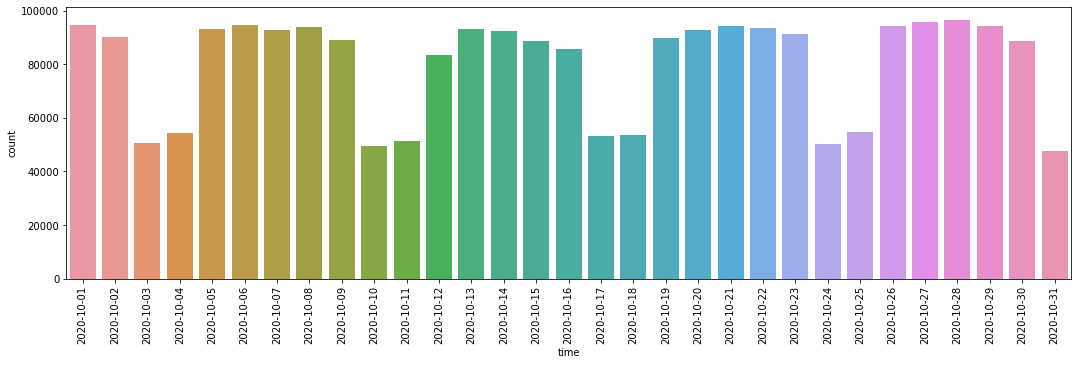

In [35]:
x=masterdt.loc[masterdt['Month'] == 10]
#x=masterdt.query(masterdt.Month >= 6)
plt.figure(figsize=(18,5))
ax=sns.countplot(x.time)
plt.xticks(rotation=90)
plt.show()

In [28]:
district_cnt=masterdt.groupby(['district'], as_index = False).count().sort_values(by="indx",ascending=False)
discnt=district_cnt.head(100)
discnt

,district,indx,time,lp_id,pct_access,engagement_index,Month
57,2956,290678,290678,290678,290678,290678,290678
165,7177,276275,276275,276275,276275,276275,276275
90,4051,272885,272885,272885,272885,272885,272885
38,2238,269102,269102,269102,269102,269102,269102
161,6919,264731,264731,264731,264731,264731,264731
...,...,...,...,...,...,...,...
133,5627,97924,97924,97924,97924,97924,97924
151,6345,96960,96960,96960,96960,96960,96960
118,5006,96812,96812,96812,96812,96812,96812
231,9899,96702,96702,96702,96702,96702,96702


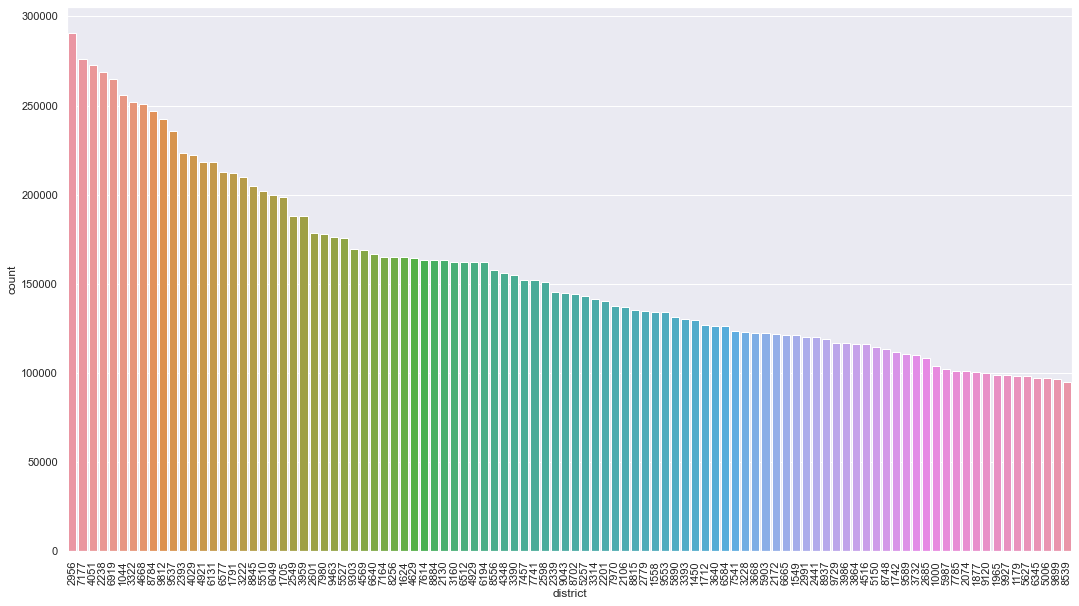

In [29]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x=masterdt.district, order = masterdt['district'].value_counts().iloc[:100].index)
plt.xticks(rotation=90)
plt.show()

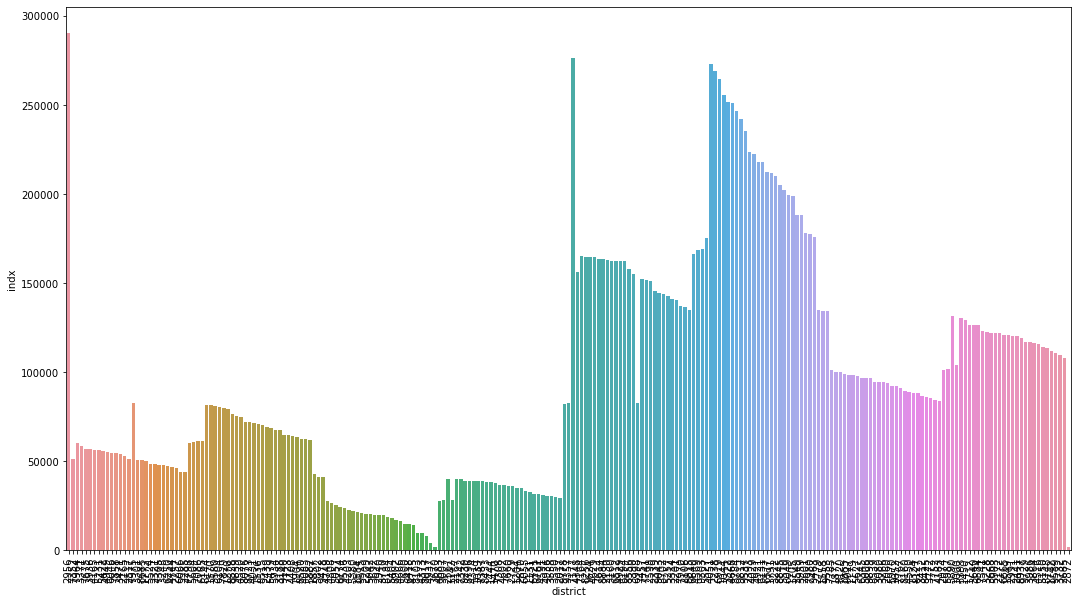

In [38]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x='district',y='indx', data=district_cnt,order = district_cnt['district'].value_counts().index) 
plt.xticks(rotation=90)
plt.show()

In [30]:
lpVspctcnt=masterdt.groupby(['lp_id'], as_index = False).count().sort_values(by="indx",ascending=False)
lpVspctcnt.head(20)

,lp_id,indx,time,pct_access,engagement_index,district,Month
8243,95731,77243,77243,77243,77243,77243,77243
8638,99916,76377,76377,76377,76377,76377,76377
1641,26488,75433,75433,75433,75433,75433,75433
1831,28504,74817,74817,74817,74817,74817,74817
2288,33185,73383,73383,73383,73383,73383,73383
2203,32213,72249,72249,72249,72249,72249,72249
6046,72758,71808,71808,71808,71808,71808,71808
380,13496,70998,70998,70998,70998,70998,70998
5745,69827,70806,70806,70806,70806,70806,70806
5752,69863,70461,70461,70461,70461,70461,70461


In [204]:
district.isnull().sum()/len(district)

district_id                 0.000000
state                       0.244635
locale                      0.244635
pct_black/hispanic          0.244635
pct_free/reduced            0.364807
county_connections_ratio    0.304721
pp_total_raw                0.493562
dtype: float64

In [31]:
masterdata= pd.merge(masterdt,prod, how='left',left_on=['lp_id'],right_on=['LP ID'])
masterdata.head(50)

,indx,time,lp_id,pct_access,engagement_index,district,Month,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,0,2020-01-01,93690,0.00,3.74,1000,1,93690.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
1,1,2020-01-01,17941,0.03,0.90,1000,1,17941.0,https://www.kidsa-z.com/main/Login,Kids A-Z,Lazel Inc.,PreK-12,LC - Digital Learning Platforms
2,2,2020-01-01,65358,0.03,1.20,1000,1,65358.0,http://www.prezi.com,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
3,3,2020-01-01,98265,0.57,37.79,1000,1,98265.0,http://quizlet.com/,Quizlet,Quizlet,PreK-12,LC - Study Tools
4,4,2020-01-01,59257,0.00,3.74,1000,1,59257.0,http://www.issuu.com,Issuu,Issuu,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
5,5,2020-01-01,90153,0.06,3.90,1000,1,90153.0,https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."
6,6,2020-01-01,41587,0.00,3.74,1000,1,41587.0,http://www.linkedin.com,LinkedIn,LinkedIn,PreK-12; Higher Ed; Corporate,LC - Career Planning & Job Search
7,7,2020-01-01,29322,0.06,5.10,1000,1,29322.0,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms
8,8,2020-01-01,37479,0.00,3.74,1000,1,37479.0,https://www.frontlineeducation.com/,Frontline Education,Frontline Education,PreK-12,SDO - Human Resources
9,9,2020-01-01,51340,0.09,1.20,1000,1,51340.0,https://www.grammarly.com/,Grammarly,Grammarly,PreK-12; Higher Ed; Corporate,LC - Study Tools


In [32]:
masterdata= pd.merge(masterdata,district, how='left',left_on=['district'],right_on=['district_id'])
masterdata.head(50)

,indx,time,lp_id,pct_access,engagement_index,district,Month,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,0,2020-01-01,93690,0.00,3.74,1000,1,93690.0,http://www.calculator.com,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference",1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
1,1,2020-01-01,17941,0.03,0.90,1000,1,17941.0,https://www.kidsa-z.com/main/Login,Kids A-Z,Lazel Inc.,PreK-12,LC - Digital Learning Platforms,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
2,2,2020-01-01,65358,0.03,1.20,1000,1,65358.0,http://www.prezi.com,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
3,3,2020-01-01,98265,0.57,37.79,1000,1,98265.0,http://quizlet.com/,Quizlet,Quizlet,PreK-12,LC - Study Tools,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
4,4,2020-01-01,59257,0.00,3.74,1000,1,59257.0,http://www.issuu.com,Issuu,Issuu,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
5,5,2020-01-01,90153,0.06,3.90,1000,1,90153.0,https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
6,6,2020-01-01,41587,0.00,3.74,1000,1,41587.0,http://www.linkedin.com,LinkedIn,LinkedIn,PreK-12; Higher Ed; Corporate,LC - Career Planning & Job Search,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
7,7,2020-01-01,29322,0.06,5.10,1000,1,29322.0,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
8,8,2020-01-01,37479,0.00,3.74,1000,1,37479.0,https://www.frontlineeducation.com/,Frontline Education,Frontline Education,PreK-12,SDO - Human Resources,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN
9,9,2020-01-01,51340,0.09,1.20,1000,1,51340.0,https://www.grammarly.com/,Grammarly,Grammarly,PreK-12; Higher Ed; Corporate,LC - Study Tools,1000,Connecticut,Suburb,"[0.6, 0.8[","[0.2, 0.4[","[0.18, 1[",NaN


In [212]:
masterdata.isnull().sum()

indx                                 0
time                                 0
lp_id                                0
pct_access                           0
engagement_index                     0
district                             0
Month                                0
LP ID                         10629335
URL                           10629335
Product Name                  10629335
Provider/Company Name         10629335
Sector(s)                     11132658
Primary Essential Function    11132658
district_id                          0
state                          4882219
locale                         4882219
pct_black/hispanic             4882219
pct_free/reduced               7322544
county_connections_ratio       6311926
pp_total_raw                  10089303
dtype: int64

In [33]:
mdata=masterdata.dropna()

In [34]:
mdata.isnull().sum()

indx                          0
time                          0
lp_id                         0
pct_access                    0
engagement_index              0
district                      0
Month                         0
LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
district_id                   0
state                         0
locale                        0
pct_black/hispanic            0
pct_free/reduced              0
county_connections_ratio      0
pp_total_raw                  0
dtype: int64

round(mdata.isnull().sum()/len(mdata)*100,2)

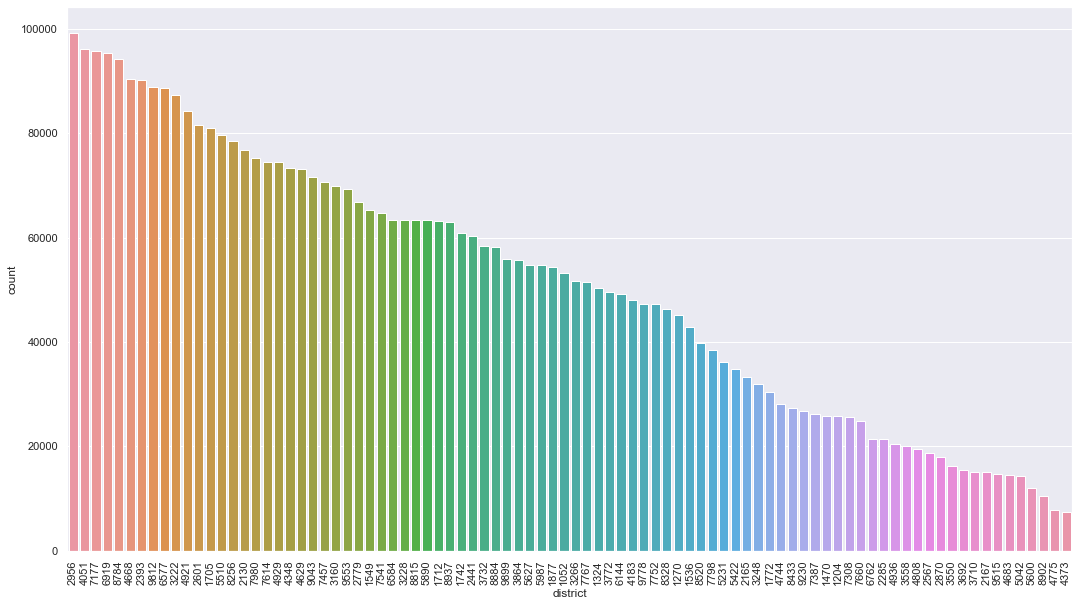

In [35]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x=mdata.district, order = mdata['district'].value_counts().iloc[:100].index)
plt.xticks(rotation=90)
plt.show()

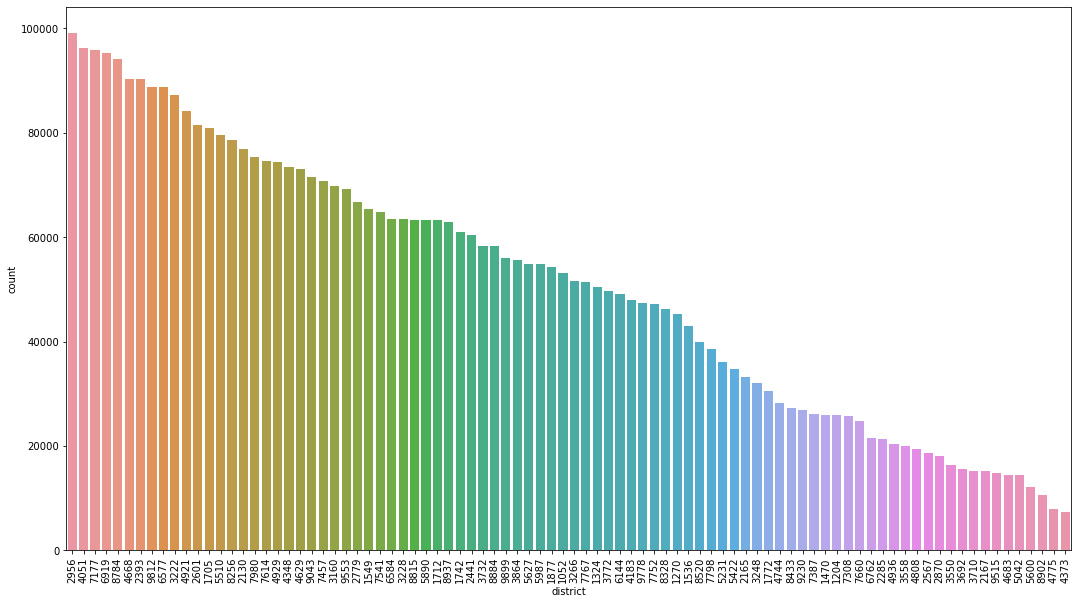

In [217]:
plt.figure(figsize=(18,10))
ax=sns.countplot(x=mdata.district, order = mdata['district'].value_counts().iloc[:100].index)
plt.xticks(rotation=90)
plt.show()

In [42]:
DistrictVsindxmed=mdata.groupby(["state"] , as_index = False).mean().sort_values(by='engagement_index',ascending=True)
DistrictVsindxmed

,state,indx,lp_id,pct_access,engagement_index,district,Month,LP ID,district_id
8,North Carolina,82479.545793,54628.544744,0.374759,100.561783,6831.151069,7.187140,54628.544744,6831.151069
3,Michigan,46880.764761,54667.919199,0.469674,111.332558,4835.247844,7.093452,54667.919199,4835.247844
0,Florida,130112.010149,53881.526522,0.491517,113.851723,6919.000000,6.680168,53881.526522,6919.000000
12,Washington,82595.910486,54299.936382,0.551971,118.496289,3944.309526,6.532129,54299.936382,3944.309526
5,Missouri,101401.245119,54345.638838,0.632129,134.044703,3557.541063,6.595981,54345.638838,3557.541063
9,Texas,63623.243071,54556.637840,0.522957,139.029671,8045.578103,7.720843,54556.637840,8045.578103
11,Virginia,75816.008385,54589.720148,0.696384,152.813392,4970.318244,6.925423,54589.720148,4970.318244
4,Minnesota,14653.457253,54959.850018,0.739304,166.344477,3550.000000,2.753900,54959.850018,3550.000000
10,Utah,58045.549265,54653.037760,0.708889,167.651123,5356.187100,6.847626,54653.037760,5356.187100
6,New Jersey,65197.117154,53941.943099,0.761072,191.215404,8301.645346,6.636584,53941.943099,8301.645346


In [37]:
districtcnt=mdata.groupby(['state'], as_index = False).count()
districtcnt

,state,indx,time,lp_id,pct_access,engagement_index,district,Month,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,district_id,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,Florida,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375,95375
1,Illinois,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240,1119240
2,Indiana,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322,336322
3,Michigan,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499
4,Minnesota,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282,16282
5,Missouri,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562,364562
6,New Jersey,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920,105920
7,New York,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780,126780
8,North Carolina,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822,230822
9,Texas,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769,72769


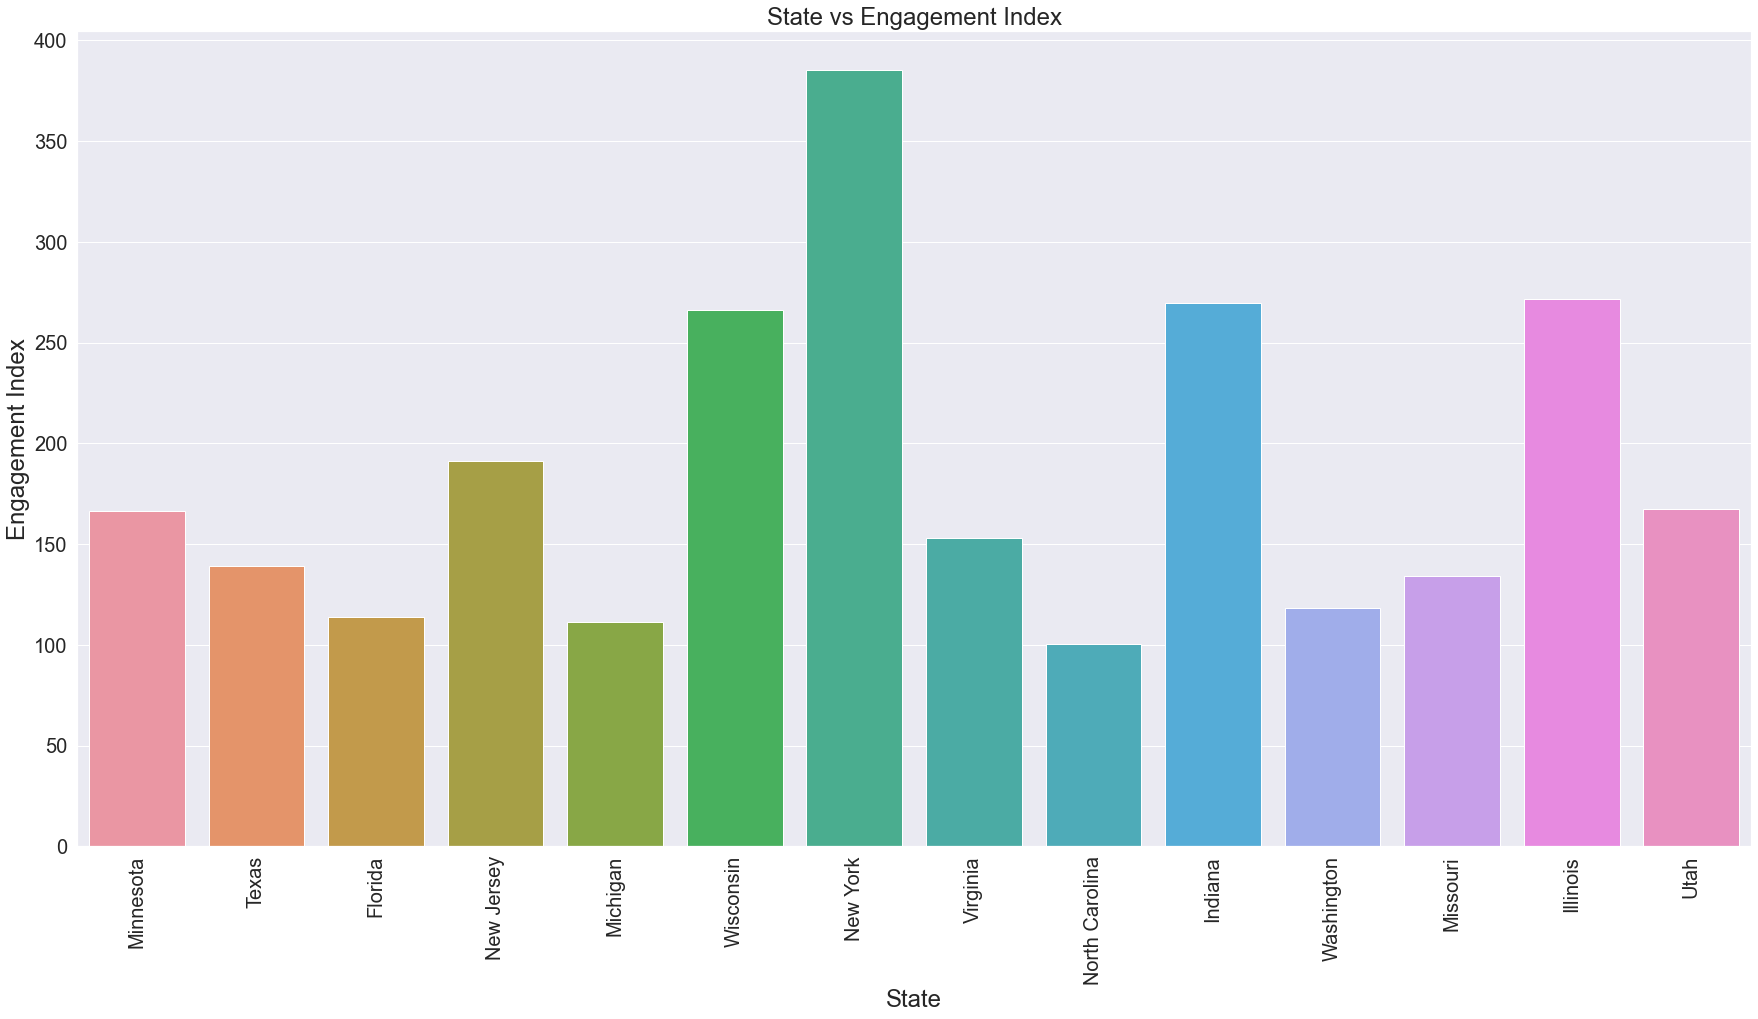

In [43]:
plt.figure(figsize=(30,15))
sns.set(style="darkgrid")
#ax=sns.barplot(x='state',y='indx',data=districtcnt )
#ax.set(ylabel='Count')
#ax2 = plt.twinx()
#sns.lineplot(x='Month',y='engagement_index', label="Max",data=monthVspctmax,
 #   markers=True, dashes=False, ax=ax2)
#sns.lineplot(x='state',y='engagement_index', label="Average",data=districtcnt,
#   markers=True, dashes=False )
sns.barplot(x='state',y='engagement_index',data=DistrictVsindxmed,
   order=districtcnt.sort_values('engagement_index').state  )#ax=ax2,
plt.title('State vs Engagement Index',{'fontsize': 24})
plt.xlabel("State",{'fontsize': 24})
plt.ylabel("Engagement Index",{'fontsize': 24})
plt.xticks(rotation=90)
plt.tick_params(labelsize = 20)
plt.show()

In [48]:
DistrictVspctacsmean=mdata.groupby(["state"] , as_index = False).mean().sort_values(by='engagement_index',ascending=True)
DistrictVspctacsmean

,state,indx,lp_id,pct_access,engagement_index,district,Month,LP ID,district_id
8,North Carolina,82479.545793,54628.544744,0.374759,100.561783,6831.151069,7.187140,54628.544744,6831.151069
3,Michigan,46880.764761,54667.919199,0.469674,111.332558,4835.247844,7.093452,54667.919199,4835.247844
0,Florida,130112.010149,53881.526522,0.491517,113.851723,6919.000000,6.680168,53881.526522,6919.000000
12,Washington,82595.910486,54299.936382,0.551971,118.496289,3944.309526,6.532129,54299.936382,3944.309526
5,Missouri,101401.245119,54345.638838,0.632129,134.044703,3557.541063,6.595981,54345.638838,3557.541063
9,Texas,63623.243071,54556.637840,0.522957,139.029671,8045.578103,7.720843,54556.637840,8045.578103
11,Virginia,75816.008385,54589.720148,0.696384,152.813392,4970.318244,6.925423,54589.720148,4970.318244
4,Minnesota,14653.457253,54959.850018,0.739304,166.344477,3550.000000,2.753900,54959.850018,3550.000000
10,Utah,58045.549265,54653.037760,0.708889,167.651123,5356.187100,6.847626,54653.037760,5356.187100
6,New Jersey,65197.117154,53941.943099,0.761072,191.215404,8301.645346,6.636584,53941.943099,8301.645346


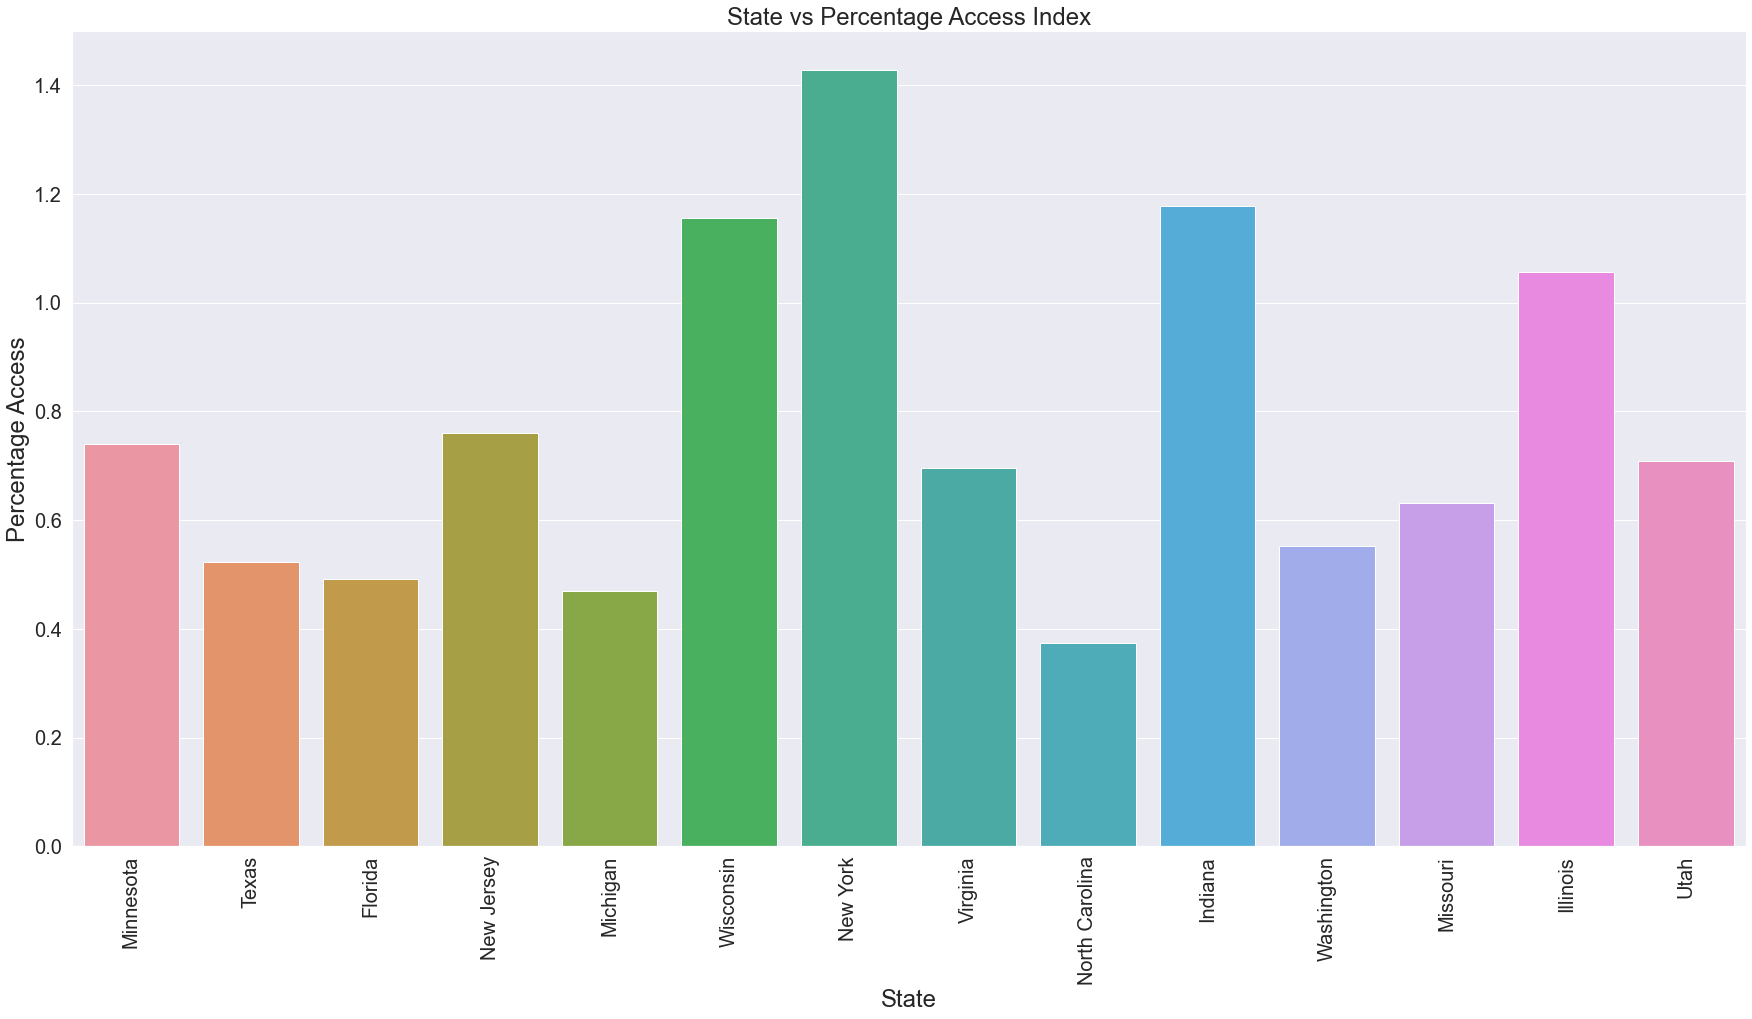

In [49]:
plt.figure(figsize=(30,15))
sns.set(style="darkgrid")
#ax=sns.barplot(x='state',y='indx',data=districtcnt )
#ax.set(ylabel='Count')
#ax2 = plt.twinx()
#sns.lineplot(x='Month',y='engagement_index', label="Max",data=monthVspctmax,
 #   markers=True, dashes=False, ax=ax2)
#sns.lineplot(x='state',y='engagement_index', label="Average",data=districtcnt,
#   markers=True, dashes=False )
sns.barplot(x='state',y='pct_access',data=DistrictVspctacsmean,
   order=districtcnt.sort_values('pct_access').state  )#ax=ax2,
plt.title('State vs Percentage Access Index',{'fontsize': 24})
plt.xlabel("State",{'fontsize': 24})
plt.ylabel("Percentage Access",{'fontsize': 24})
plt.xticks(rotation=90)
plt.tick_params(labelsize = 20)
plt.show()

In [50]:
localeVsindxmed=mdata.groupby(["locale"] , as_index = False).mean().sort_values(by='engagement_index',ascending=True)
localeVsindxmed

,locale,indx,lp_id,pct_access,engagement_index,district,Month,LP ID,district_id
0,City,85226.239591,54402.186755,0.596647,135.277882,5158.893652,6.946184,54402.186755,5158.893652
3,Town,43307.962418,54873.885364,0.744401,179.854201,5021.031470,6.677878,54873.885364,5021.031470
2,Suburb,74427.091376,54416.880541,0.831150,199.292611,5338.138866,6.732524,54416.880541,5338.138866
1,Rural,52700.975731,54600.564587,0.995034,254.818451,5160.118632,6.900209,54600.564587,5160.118632


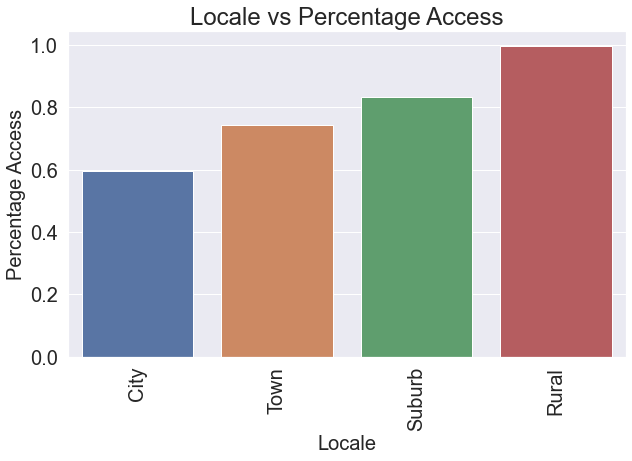

In [57]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
#ax=sns.barplot(x='state',y='indx',data=districtcnt )
#ax.set(ylabel='Count')
#ax2 = plt.twinx()
#sns.lineplot(x='Month',y='engagement_index', label="Max",data=monthVspctmax,
 #   markers=True, dashes=False, ax=ax2)
#sns.lineplot(x='state',y='engagement_index', label="Average",data=districtcnt,
#   markers=True, dashes=False )
sns.barplot(x='locale',y='pct_access',data=localeVsindxmed,
    )#ax=ax2,
plt.title('Locale vs Percentage Access',{'fontsize': 24})
plt.xlabel("Locale",{'fontsize': 20})
plt.ylabel("Percentage Access",{'fontsize': 20})
plt.xticks(rotation=90)
plt.tick_params(labelsize = 20)
plt.show()

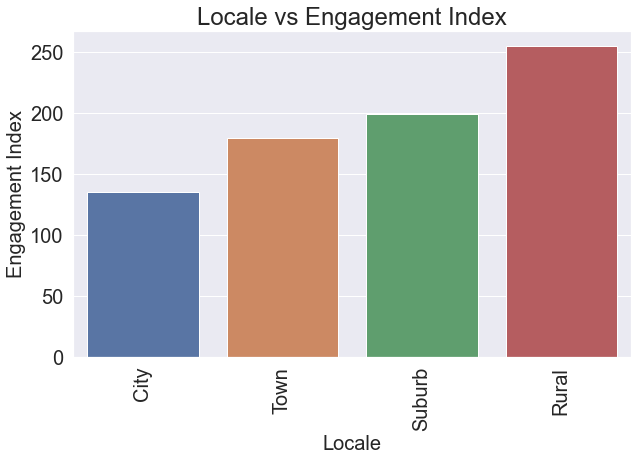

In [58]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
#ax=sns.barplot(x='state',y='indx',data=districtcnt )
#ax.set(ylabel='Count')
#ax2 = plt.twinx()
#sns.lineplot(x='Month',y='engagement_index', label="Max",data=monthVspctmax,
 #   markers=True, dashes=False, ax=ax2)
#sns.lineplot(x='state',y='engagement_index', label="Average",data=districtcnt,
#   markers=True, dashes=False )
sns.barplot(x='locale',y='engagement_index',data=localeVsindxmed,
    )#ax=ax2,
plt.title('Locale vs Engagement Index',{'fontsize': 24})
plt.xlabel("Locale",{'fontsize': 20})
plt.ylabel("Engagement Index",{'fontsize': 20})
plt.xticks(rotation=90)
plt.tick_params(labelsize = 20)
plt.show()